# Visualize multi sensitive attributes experiment

In [ ]:
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [236]:
def get_all_adult(min_pts):

    exp_list = []
    exp_list_1 = []
    exp_list_2 = []
    exp_list_3 = []
    
    elements = ['gender','marital_status','race','Mixed']
    # mapping for sensitive attributes
    mapping = {'g':'G','m':'M','r':'R','gm':'G&M','mr':'M&R','gr':'G&R','gmr':'G&M&R'}
    experiment_path= "../results/adult_multi_exp/"
    min_pts = 15
    # collect all experiment results
    files = [f for f in os.listdir(experiment_path) if 'result' in f]
    for file in files:
        # read file
        experiment = pd.read_csv(experiment_path+file)
        experiment = experiment.fillna(0)
        split = file.split('_')
        name = split[-2]
        number =split[-1][:-4]
        # add number of sensitive attributes to be considered
        experiment['Sensitive attribute(s)'] = [mapping[number]]*len(experiment)
        # if only one sensitive attribute (g, m, r)
        if len(number) ==1:
            # get the balance for each attribute
            for i in range(3):
                experiment['value'] = experiment['Balance_{}'.format(elements[i])]*(1-experiment['Noise'])
                if 'Mixed' in elements[i]:
                    experiment['Balance'] = [str('C').upper()]*len(experiment)
                else:
                    experiment['Balance'] = [str(elements[i][0]).upper()]*len(experiment)
                experiment['Len'] = [1]*len(experiment)
                exp_list_1.append(experiment.copy())
                exp_list.append(experiment.copy())
        # if two sensitive attributes (gm, gr, mr)
        elif len(number) ==2:
            # get the balance for each attribute
            for i in range(3):
                if 'Mixed' in elements[i]:
                    experiment['Balance'] = [str('C').upper()]*len(experiment)
                else:
                    experiment['Balance'] = [str(elements[i][0]).upper()]*len(experiment)
                experiment['value'] = experiment['Balance_{}'.format(elements[i])]*(1-experiment['Noise'])
                experiment['Len'] = [2]*len(experiment)
                exp_list_2.append(experiment.copy())
                exp_list.append(experiment.copy())
        # if three sensitive attributes (gmr)
        else:
            # get the balance for each attribute
            for i in range(3):
                if 'Mixed' in elements[i]:
                    experiment['Balance'] = [str('C').upper()]*len(experiment)
                else:
                    experiment['Balance'] = [str(elements[i][0]).upper()]*len(experiment)
                experiment['value'] = experiment['Balance_{}'.format(elements[i])]*(1-experiment['Noise'])
                experiment['Len'] = [3]*len(experiment)
                exp_list_3.append(experiment.copy())
                exp_list.append(experiment.copy())
    # add all results for one sensitive attribute
    one_sens = pd.concat(exp_list_1, ignore_index=True)
    one_sens = one_sens[(one_sens['Algorithm']=='FairDEN_v1') & (one_sens['Degree']==2.0)& (one_sens['min_pts']==min_pts)]
    one_sens = one_sens.drop(['Unnamed: 0', 'DCSI','Categorical','Data','ARI','NMI','ARI_DB','NMI_DB','Noise'], axis=1)
    one_sens = one_sens.drop_duplicates()
    # add all results for two sensitive attributes
    two_sens = pd.concat(exp_list_2, ignore_index=True)
    two_sens = two_sens[(two_sens['Algorithm']=='FairDEN_v1') & (two_sens['Degree']==2.0)& (two_sens['min_pts']==min_pts)]
    two_sens = two_sens.drop(['Unnamed: 0', 'min_pts','DCSI','Categorical','Data','Algorithm','ARI','NMI','ARI_DB','NMI_DB','Degree','Noise'], axis=1)
    two_sens = two_sens.drop_duplicates()
    # add all results for three sensitive attributes
    all_sens = pd.concat(exp_list_3, ignore_index=True)
    all_sens_FairDen = all_sens[(all_sens['Algorithm']=='FairDEN_v1') & (all_sens['Degree']==2.0)& (all_sens['min_pts']==min_pts)]
    all_sens_FairDen = all_sens_FairDen.drop(['Unnamed: 0', 'min_pts','DCSI','Categorical','Data','Algorithm','ARI','NMI','ARI_DB','NMI_DB','Degree','Noise'], axis=1)
    all_sens_FairDen = all_sens_FairDen.drop_duplicates()
    
    return one_sens, two_sens, all_sens_FairDen

In [238]:
def plot_three(sens, sens2, sens3):
    # one sensitive attribute
    sens = sens.pivot(columns="Balance", index="Sensitive attribute(s)", values="value")
    # two sensitive attributes
    sens2 = sens2.pivot(columns="Balance", index="Sensitive attribute(s)", values="value")
    # three sensitive attributes
    sens3 = sens3.pivot(columns="Balance", index="Sensitive attribute(s)", values="value")
    # plot all three heatmaps
    fig, axes = plt.subplots(ncols=3, figsize=(24, 6))
    sns.set_context("paper")
    sns.set(font_scale=2.6)
    ax1, ax2, ax3 = axes
    sns.heatmap(sens, vmin=0, vmax=1, annot=True, cbar=False, ax= ax1, cmap="PiYG")
    s = sns.heatmap(sens2, vmin=0, vmax=1, annot=True, cbar=False, ax= ax2, cmap="PiYG")
    s.set(ylabel='')
    f = sns.heatmap(sens3, vmin=0, vmax=1, annot=True, cbar=False, ax= ax3, cmap= "PiYG")
    f.set(ylabel='')
    sns.despine(right = True)
    left  = 0.12  # the left side of the subplots of the figure
    right = 0.9    # the right side of the subplots of the figure
    bottom = 0.2 # the bottom of the subplots of the figure
    top = 0.9      # the top of the subplots of the figure
    wspace = 0.3  # the amount of width reserved for blank space between subplots
    hspace = 0.2   # the amount of height reserved for white space between subplots
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    #plt.tight_layout()
    #plt.savefig("Heatmap_adult_categorical_5_2000.png", dpi=300)

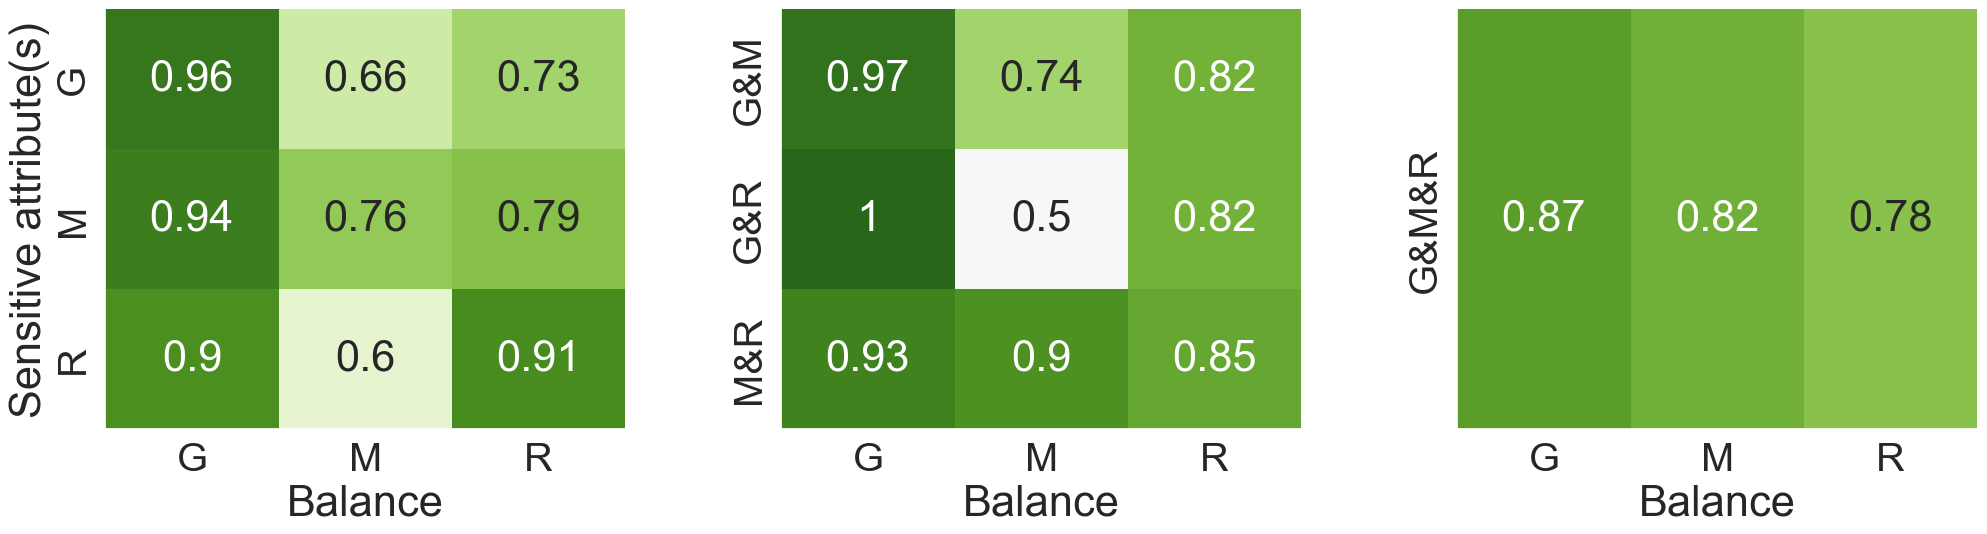

In [241]:

sens, two_sens, all_sens = get_all_adult()
plot_three(sens, two_sens, all_sens)
#plot(experiment,0)